In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import DataFrame, Series

%matplotlib inline

In [4]:
raw = pd.read_csv('HR_comma_sep.csv')

In [5]:
raw.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [6]:
raw.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [7]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [8]:
df = raw.copy()

Corrilation test on left with sales and salary

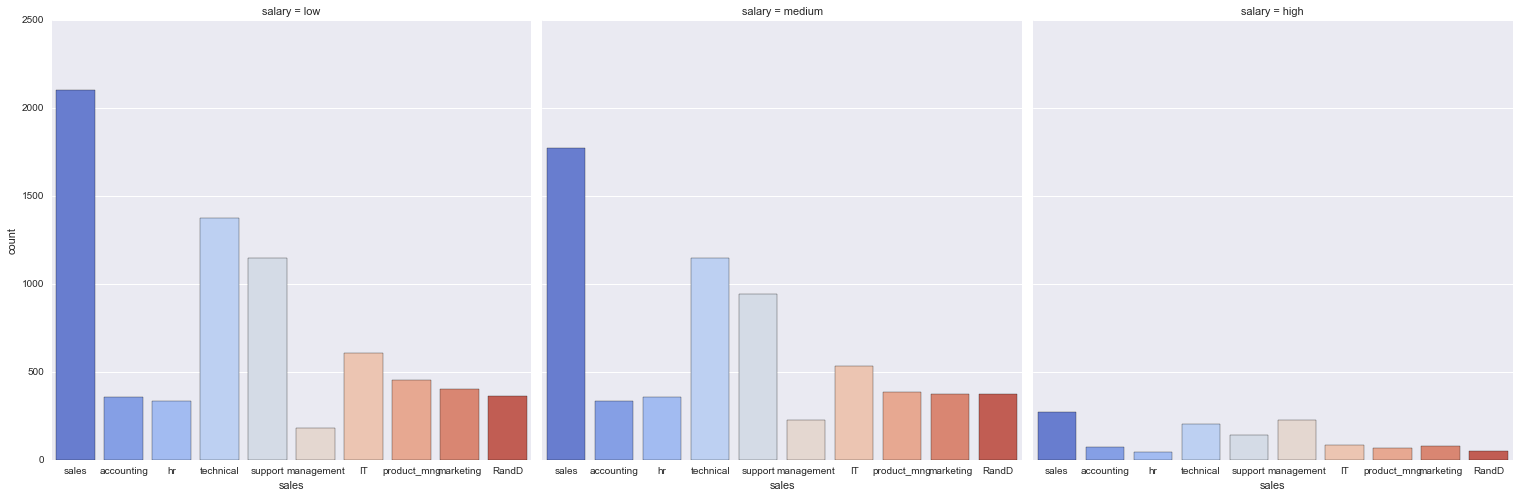

In [69]:
sns.factorplot(x='sales',col='salary',data=df,kind='count',size=7,palette='coolwarm')

In [9]:
pd.crosstab(df['sales'],df['left'],margins=True)

left,0,1,All
sales,,,
IT,954,273,1227
RandD,666,121,787
accounting,563,204,767
hr,524,215,739
management,539,91,630
marketing,655,203,858
product_mng,704,198,902
sales,3126,1014,4140
support,1674,555,2229


In [10]:
from scipy.stats import chi2_contingency
def chisq_test_col(df,col1,col2):
    group=df.groupby([col1,col2]).size()
    ct = group.unstack(col1)
    return chi2_contingency(ct.fillna(0))

In [11]:
chisq_test_col(df, 'left', 'sales')

(86.82547426790299,
 7.0421304638225176e-15,
 9,
 array([[  934.87272485,   292.12727515],
        [  599.62904194,   187.37095806],
        [  584.39069271,   182.60930729],
        [  563.0570038 ,   175.9429962 ],
        [  480.00800053,   149.99199947],
        [  653.72518168,   204.27481832],
        [  687.24954997,   214.75045003],
        [ 3154.33828922,   985.66171078],
        [ 1698.31402093,   530.68597907],
        [ 2072.41549437,   647.58450563]]))

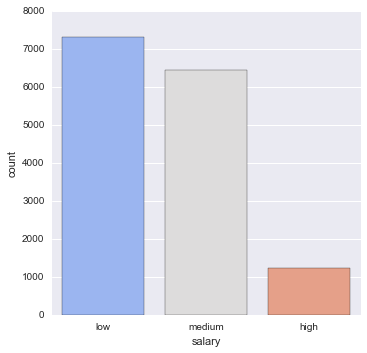

In [46]:
sns.factorplot(x='salary',data=df,kind='count',size=5,palette='coolwarm')

In [14]:
pd.crosstab(df['salary'],df['left'],margins=True)

left,0,1,All
salary,,,
high,1155,82,1237
low,5144,2172,7316
medium,5129,1317,6446
All,11428,3571,14999


In [13]:
chisq_test_col(df, 'left', 'salary')

(381.22504706621066,
 1.6520867492959581e-83,
 2,
 array([[  942.49189946,   294.50810054],
        [ 5574.18814588,  1741.81185412],
        [ 4911.31995466,  1534.68004534]]))

In [48]:
df_num=df.drop(['sales','salary'],axis=1)

In [57]:
corr_df_num = df_num.corr()

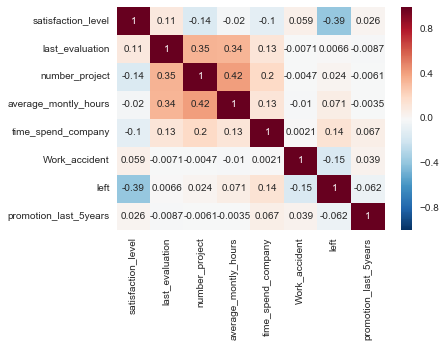

In [70]:
sns.heatmap(corr_df_num,annot=True)

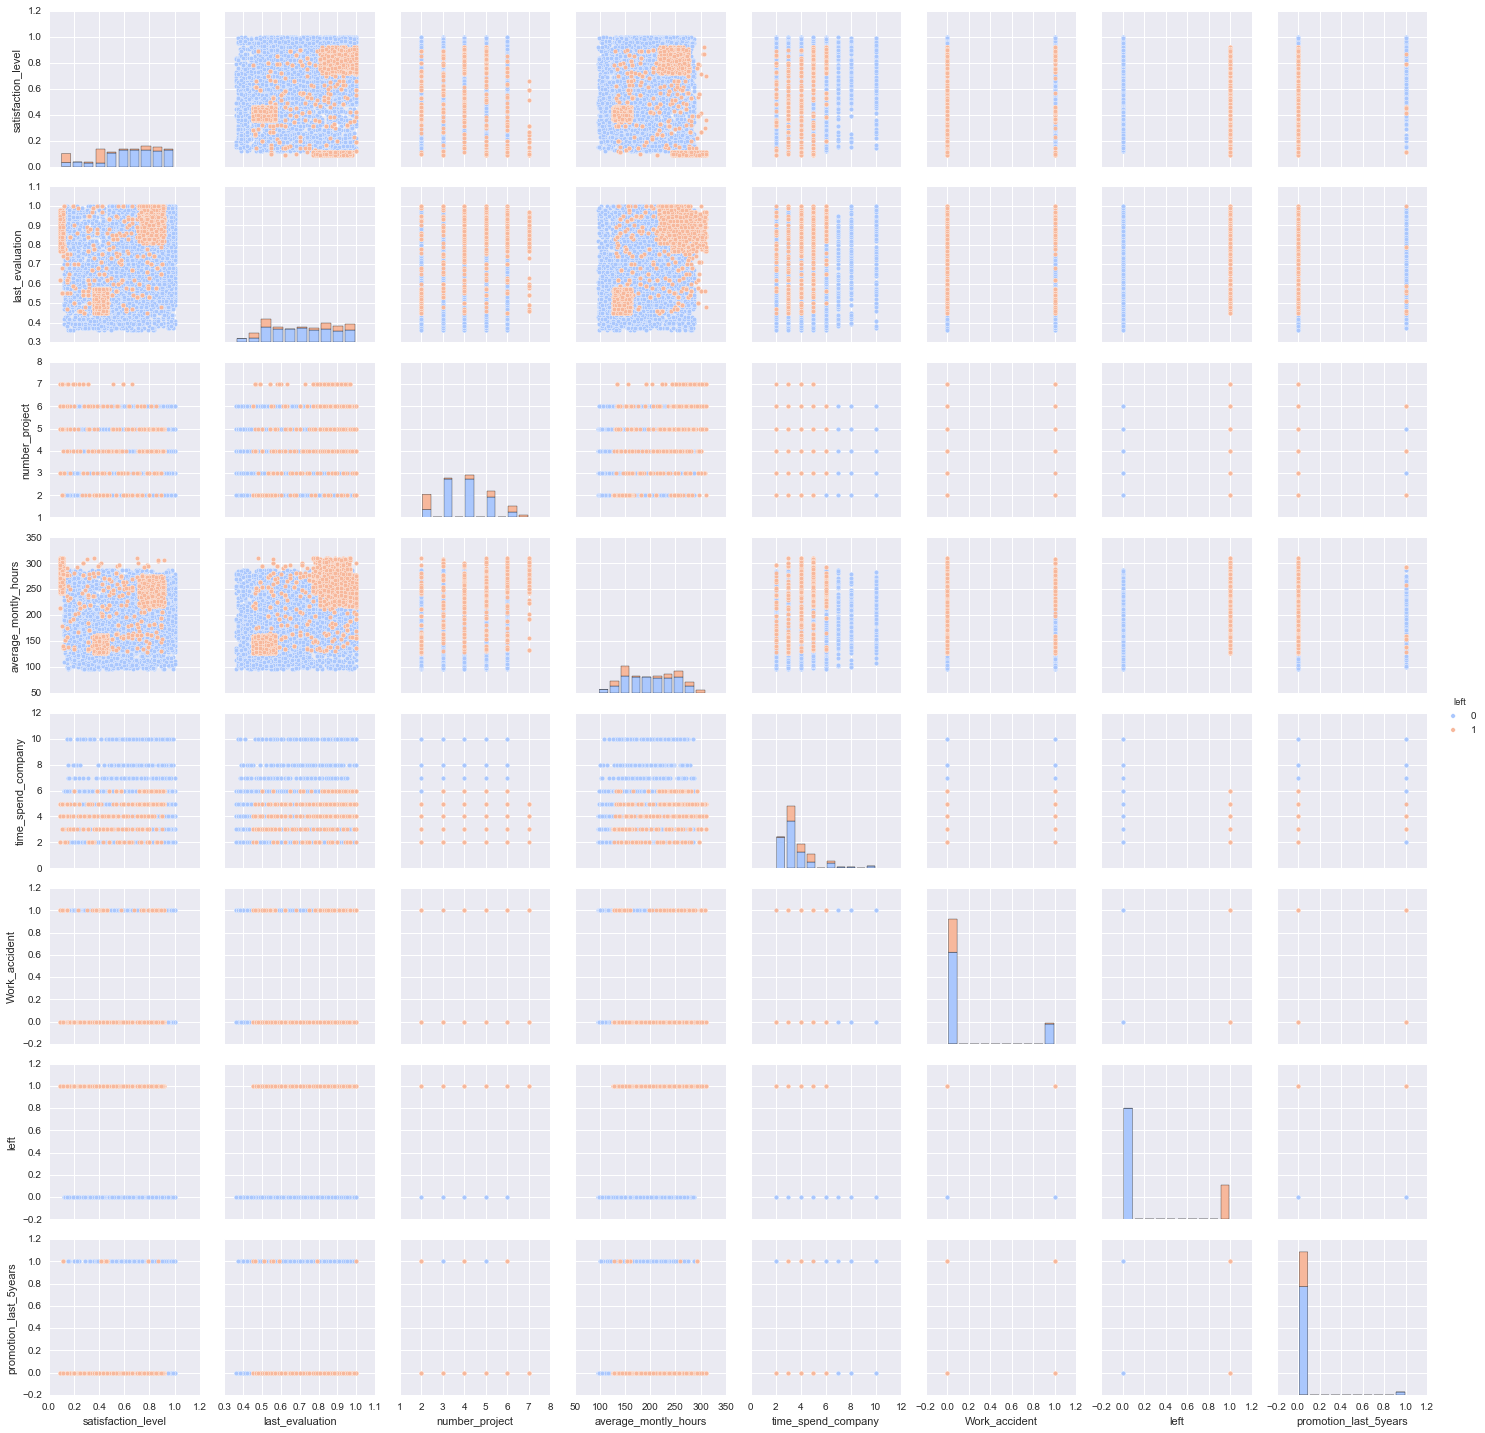

In [71]:
sns.pairplot(df_num,hue='left',kind='scatter',palette='coolwarm')

#

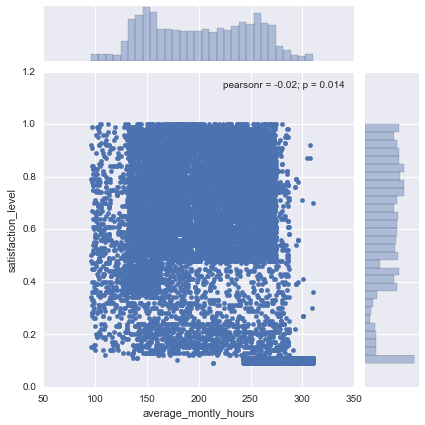

In [78]:
sns.jointplot(df.average_montly_hours, df_num.satisfaction_level,kind='scatter')

In [92]:
dfcopy = pd.get_dummies(df)
y = dfcopy['left']
X = dfcopy.drop('left',axis=1)
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.80,0.86,5,262,6,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.11,0.88,7,272,4,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.72,0.87,5,223,5,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.37,0.52,2,159,3,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [81]:
from sklearn.preprocessing import StandardScaler

In [93]:
scaler=StandardScaler()
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [94]:
scaler_data = scaler.fit_transform(X)

In [95]:
scaler_data

array([[-0.93649469, -1.08727529, -1.46286291, ..., -0.29980859,
         1.02477511, -0.8681323 ],
       [ 0.75281433,  0.84070693,  0.97111292, ..., -0.29980859,
        -0.97582386,  1.15189816],
       [-2.02247906,  0.95755433,  2.59376348, ..., -0.29980859,
        -0.97582386,  1.15189816],
       ..., 
       [-0.97671633, -1.08727529, -1.46286291, ..., -0.29980859,
         1.02477511, -0.8681323 ],
       [-2.02247906,  1.42494396,  1.7824382 , ..., -0.29980859,
         1.02477511, -0.8681323 ],
       [-0.97671633, -1.14569899, -1.46286291, ..., -0.29980859,
         1.02477511, -0.8681323 ]])

In [97]:
scaler_df = pd.DataFrame(scaler_data,columns=X.columns)

In [98]:
scaler_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,-0.936495,-1.087275,-1.462863,-0.882040,-0.341235,-0.411165,-0.147412,-0.298486,-0.235321,-0.232148,-0.227647,-0.209391,-0.246322,-0.252953,1.619551,-0.417791,-0.470655,-0.299809,1.024775,-0.868132
1,0.752814,0.840707,0.971113,1.220423,1.713436,-0.411165,-0.147412,-0.298486,-0.235321,-0.232148,-0.227647,-0.209391,-0.246322,-0.252953,1.619551,-0.417791,-0.470655,-0.299809,-0.975824,1.151898
2,-2.022479,0.957554,2.593763,1.420657,0.343655,-0.411165,-0.147412,-0.298486,-0.235321,-0.232148,-0.227647,-0.209391,-0.246322,-0.252953,1.619551,-0.417791,-0.470655,-0.299809,-0.975824,1.151898
3,0.431041,0.899131,0.971113,0.439508,1.028546,-0.411165,-0.147412,-0.298486,-0.235321,-0.232148,-0.227647,-0.209391,-0.246322,-0.252953,1.619551,-0.417791,-0.470655,-0.299809,1.024775,-0.868132
4,-0.976716,-1.145699,-1.462863,-0.841993,-0.341235,-0.411165,-0.147412,-0.298486,-0.235321,-0.232148,-0.227647,-0.209391,-0.246322,-0.252953,1.619551,-0.417791,-0.470655,-0.299809,1.024775,-0.868132


In [99]:
from sklearn.decomposition import PCA

In [100]:
pca = PCA(n_components=2)

In [101]:
pca.fit(scaler_data)

PCA(copy=True, n_components=2, whiten=False)

In [102]:
x_pca = pca.transform(scaler_data)

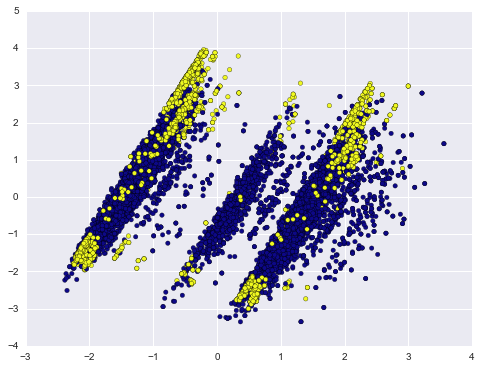

In [106]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=y,cmap='plasma')

#Two componets cannot discribe the dataset well. Pause for now.

Linear regression

In [107]:
from sklearn.cross_validation import train_test_split

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [122]:
from sklearn.linear_model import LinearRegression

In [123]:
lm = LinearRegression()

In [124]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [126]:
print(lm.intercept_)

0.429891940211


In [129]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df
#None of the features are significiently effecting the model

,Coefficient
satisfaction_level,-0.650043
last_evaluation,0.082359
number_project,-0.034485
average_montly_hours,0.000623
time_spend_company,0.037222
Work_accident,-0.153800
promotion_last_5years,-0.092511
sales_IT,-0.007342
sales_RandD,-0.064702
sales_accounting,0.029055


In [131]:
from sklearn.linear_model import LogisticRegression

In [133]:
lg=LogisticRegression()

In [134]:
lg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [135]:
predict = lg.predict(X_test)

In [136]:
from sklearn.metrics import classification_report

In [137]:
print(classification_report(y_test, predict))

             precision    recall  f1-score   support

          0       0.82      0.93      0.87      3431
          1       0.60      0.35      0.44      1069

avg / total       0.77      0.79      0.77      4500



In [138]:
from sklearn.svm import SVC

In [139]:
svc_model = SVC()

In [140]:
svc_model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [142]:
predict = svc_model.predict(X_test)

In [141]:
from sklearn.metrics import classification_report, confusion_matrix

In [143]:
print (confusion_matrix(y_test, predict))
print('\n')
print(classification_report(y_test, predict))

[[3294  137]
 [  74  995]]


             precision    recall  f1-score   support

          0       0.98      0.96      0.97      3431
          1       0.88      0.93      0.90      1069

avg / total       0.95      0.95      0.95      4500



# Nice model 88% accuracy to predict left and 98% predict stay. And recall avg 95%. With type 1 error as low as 74 out of 4289.

In [144]:
from sklearn.neighbors import KNeighborsClassifier

In [165]:
knn = KNeighborsClassifier(n_neighbors=1)

In [166]:
X_train, X_test, y_train, y_test = train_test_split(scaler_df, y, test_size=0.3, random_state=101)

In [167]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [168]:
predict = knn.predict(X_test)

In [169]:
print (confusion_matrix(y_test, predict))
print('\n')
print(classification_report(y_test, predict))

[[3319  112]
 [  38 1031]]


             precision    recall  f1-score   support

          0       0.99      0.97      0.98      3431
          1       0.90      0.96      0.93      1069

avg / total       0.97      0.97      0.97      4500



#Good model too

In [171]:
from sklearn.cluster import KMeans

In [181]:
km = KMeans(n_clusters=3)

In [193]:
km.fit(scaler_data)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [194]:
km.cluster_centers_

array([[ -4.85892673e-02,   5.35018444e-03,  -2.56612959e-03,
         -1.07633787e-03,  -4.11041174e-02,  -6.98154781e-03,
         -8.48838742e-02,   5.24232911e-03,  -1.21817366e-02,
         -1.00006034e-02,  -1.60785675e-02,  -8.67376856e-02,
         -9.71338136e-03,   6.34457142e-03,   2.43543141e-02,
          2.25836019e-02,   1.60619843e-02,  -2.99808591e-01,
          1.02477511e+00,  -8.68132299e-01],
       [  9.90906941e-02,  -6.88041954e-02,  -2.91061961e-02,
         -2.36860539e-02,   1.33260473e-01,   3.01517813e-02,
          2.56016824e-01,  -5.36641681e-02,  -5.04158595e-02,
          3.94295550e-02,  -5.95645282e-02,   6.97367863e-01,
          3.21609115e-02,  -2.17279898e-02,  -1.30991935e-01,
         -9.73407783e-02,  -4.89367422e-02,   3.33546146e+00,
         -9.75823858e-01,  -8.68132299e-01],
       [  3.61315376e-02,   7.13137455e-03,   8.49800941e-03,
          5.76700846e-03,   2.10788889e-02,   2.13764355e-03,
          4.72103028e-02,   4.34838600e-03

In [195]:
km.labels_

array([0, 2, 2, ..., 0, 0, 0])

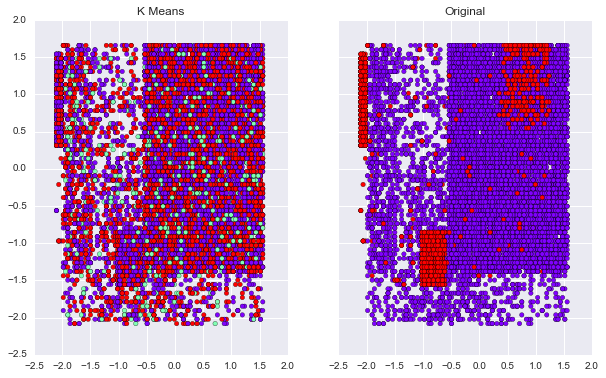

In [197]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))
ax1.set_title('K Means')
ax1.scatter(scaler_data[:,0],scaler_data[:,1],c=km.labels_,cmap='rainbow')
ax2.set_title("Original")
ax2.scatter(scaler_data[:,0],scaler_data[:,1],c=y,cmap='rainbow')

In [198]:
from sklearn.linear_model import SGDClassifier

In [201]:
sgd = SGDClassifier(loss='hinge',penalty='l2')

In [205]:
sgd.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False)

In [207]:
predict = sgd.predict(X_test)

In [209]:
print (confusion_matrix(y_test, predict))
print('\n')
print(classification_report(y_test, predict))

[[2787  644]
 [ 602  467]]


             precision    recall  f1-score   support

          0       0.82      0.81      0.82      3431
          1       0.42      0.44      0.43      1069

avg / total       0.73      0.72      0.72      4500



#Much worse